In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
mv machine_learning/ml_concepts ./


In [37]:
df = pd.read_csv(r"C:\Users\khushi pawar\Downloads\placement.csv")
df1= pd.read_csv(r"C:\Users\khushi pawar\Downloads\placement.csv")

In [3]:
df.sample(5)

,cgpa,placement_exam_marks,placed
301,7.84,5.0,1
155,7.84,12.0,0
908,6.06,17.0,1
406,7.14,17.0,1
842,7.33,14.0,1


In [4]:
df.shape

(1000, 3)

<Axes: xlabel='placement_exam_marks'>

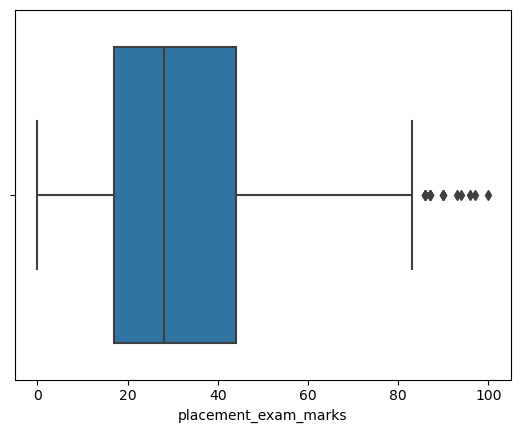

In [5]:
sns.boxplot(x=df['placement_exam_marks'])

In [6]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

In [11]:
percentile_25 = df['placement_exam_marks'].quantile(0.25)
percentile_75 = df['placement_exam_marks'].quantile(0.75)

In [12]:
percentile_75

44.0

In [14]:
iqr = percentile_75-percentile_25
iqr

27.0

**formula min and max**

In [22]:
max = percentile_75 + 1.5 * iqr
min = percentile_25 - 1.5 * iqr

In [23]:
min

-23.5

In [24]:
max

84.5

In [28]:
outlier = df[ (df['placement_exam_marks']<min) | (df['placement_exam_marks']>max)]

In [30]:
outlier.shape

(15, 3)

**trimming**

In [26]:
new_df = df.copy()

new_df = df[ (df['placement_exam_marks']>min) & (df['placement_exam_marks']<max) ]

In [27]:
new_df.shape

(985, 3)

<Axes: xlabel='placement_exam_marks'>

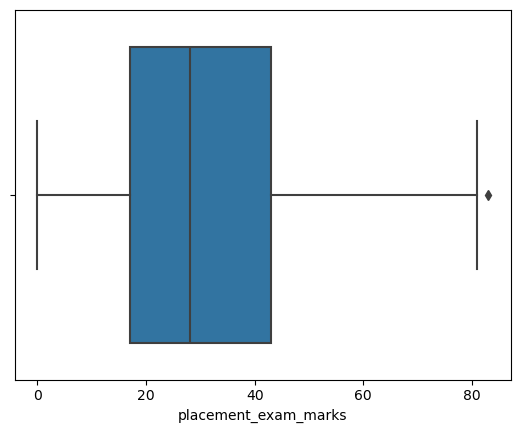

In [31]:
sns.boxplot(x=new_df['placement_exam_marks'])


C:\Users\khushi pawar\AppData\Local\Temp\ipykernel_32284\4012955298.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['placement_exam_marks'],kde=True)
C:\Users\khushi pawar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

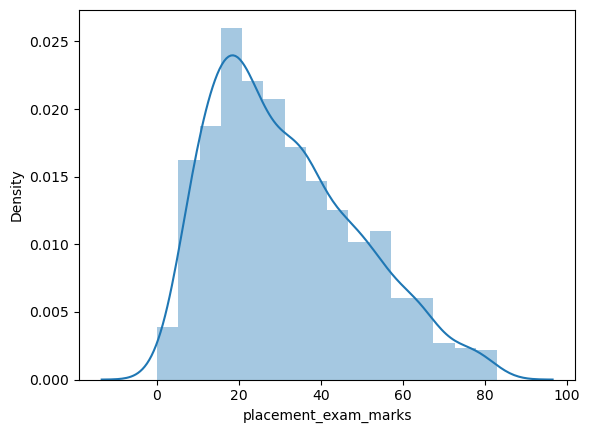

In [32]:
sns.distplot(new_df['placement_exam_marks'],kde=True)

**capping**

In [38]:
df['placement_exam_marks'] = np.where(
    df['placement_exam_marks']>max,
    max,
    np.where(
        df['placement_exam_marks']<min,
        min,
        df['placement_exam_marks']
    )
)

In [39]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.136500
std        18.865419
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max        84.500000
Name: placement_exam_marks, dtype: float64

In [36]:
df[ df['placement_exam_marks']>max ].shape

(15, 4)